<a href="https://colab.research.google.com/github/ahnafhabibi/Wildfire-Spread-Research/blob/main/wildfire_spreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [317]:
class init_forest:
    """
    Class to initialize the forest grid for the wildfire simulation.

    Attributes:
    -----------
    height : numpy.ndarray
        A 2D array representing the central height of each cell in the forest.
    fire_rate : numpy.ndarray
        A 2D array representing the fire rate at each cell in the forest.
    burn_area : numpy.ndarray
        A 2D array representing the initial burn status of each cell (0 for unburned, 1 for burned, 0 to 1 for semi-burn).
    """

    def __init__(self, n):
        """
        Initializes the forest grid.

        Parameters:
        -----------
        n : int
            The dimension of the forest grid (n x n).
        """
        self.height = np.random.uniform(0, 1, (n, n))  # Random height values between 0 and 1
        self.fire_rate = np.random.uniform(0, 1, (n, n))  # Random fire rate values between 0 and 1
        self.burn_area = self.create_burn_grid(n, prob_zero=0.95)  # Initial burn area with mostly unburned cells

    def create_burn_grid(self, n, prob_zero):
        """
        Creates the initial burn area grid.

        Parameters:
        -----------
        n : int
            The dimension of the forest grid (n x n).
        prob_zero : float
            The probability that a cell starts as unburned (0).

        Returns:
        --------
        grid : numpy.ndarray
            A 2D array representing the burn status of each cell (float values starting from 0).
        """
        grid = np.random.choice([0, 1], size=(n, n), p=[prob_zero, 1 - prob_zero])
        grid = grid.astype(float)
        return grid


class forest_fire_progress:
    """
    Class to simulate the progression of a wildfire in the forest.

    Attributes:
    -----------
    dimension : int
        The dimension of the forest grid (n x n).
    forest : init_forest
        An instance of the init_forest class.
    height : numpy.ndarray
        A 2D array representing the central height of each cell in the forest.
    fire_rate : numpy.ndarray
        A 2D array representing the fire rate at each cell in the forest.
    neighbourhood : int
        The neighborhood size used in the cellular automaton (default is 3x3).
    burn_area : numpy.ndarray
        A 2D array representing the current burn status of each cell (float values between 0 and 1).
    """

    def __init__(self, dimension):
        """
        Initializes the wildfire simulation.

        Parameters:
        -----------
        dimension : int
            The dimension of the forest grid (n x n).
        """
        self.dimension = dimension
        self.forest = init_forest(self.dimension)
        self.height = self.forest.height
        self.fire_rate = self.forest.fire_rate
        self.neighbourhood = 3  # Default neighborhood size for cellular automaton
        self.burn_area = self.forest.burn_area

    def H_rule(self, k, l, i, j):
        """
        Calculates the height difference between two cells.

        Parameters:
        -----------
        k, l : int
            Coordinates of the neighboring cell.
        i, j : int
            Coordinates of the current cell.

        Returns:
        --------
        float
            The height difference between the current cell and the neighboring cell.
        """
        return self.height[i, j] - self.height[k, l]

    def CA_rule(self, burn_area, N, W, S, E, NW, NE, SW, SE, i, j):
        """
        Applies the Cellular Automaton rule to determine the burn status of a cell.

        Parameters:
        -----------
        burn_area : numpy.ndarray
            The current burn status of each cell.
        N, W, S, E, NW, NE, SW, SE : float
            The influence of neighboring cells (North, West, South, East, Northwest, Northeast, Southwest, Southeast).
        i, j : int
            Coordinates of the current cell.

        Returns:
        --------
        float
            The updated burn status of the cell.
        """
        n=self.dimension
        if (i==0) & (j==0):
          if burn_area[i,j]==1:
            return 1
          else:
            val= burn_area[i,j] + E*(self.H_rule(i,j+1,i,j))*burn_area[i,j+1] + S*(self.H_rule(i+1,j,i,j))*burn_area[i+1,j]+ 0.83*SE*(self.H_rule(i+1,j+1,i,j))*burn_area[i+1,j+1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (i==n-1) & (j==0):
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i,j]+ E*(self.H_rule(i,j+1,i,j))*burn_area[i,j+1] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j]+ 0.83*NE*(self.H_rule(i-1,j+1,i,j))*burn_area[i-1,j+1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (i==0)&(j==n-1):
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i,j]+ W*(self.H_rule(i,j-1,i,j))*burn_area[i,j-1] + S*(self.H_rule(i+1,j,i,j))*burn_area[i+1,j]+ + 0.83* SW*(self.H_rule(i+1,j-1,i,j))*burn_area[i+1,j-1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (i==n-1)&(j==n-1):
          if burn_area[i,j]==1:
            return 1
          else:
            val= burn_area[i,j]+ W*(self.H_rule(i,j-1,i,j))*burn_area[i,j-1] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j]+ 0.83*NW*(self.H_rule(i-1,j-1,i,j))*burn_area[i-1,j-1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (i==0):
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i, j] + E * (self.H_rule(i, j + 1, i, j)) * burn_area[i, j + 1] + S * (self.H_rule(i + 1, j, i, j)) * burn_area[i + 1, j] + 0.83 * SE * (self.H_rule(i + 1, j + 1, i, j)) * burn_area[i + 1, j + 1] +0.83 * SW * (self.H_rule(i + 1, j - 1, i, j)) * burn_area[i + 1, j - 1] +W * (self.H_rule(i, j - 1, i, j)) * burn_area[i, j - 1]
            if val>1:
              return 1

            elif val<0:
              return 0
            else:
              return val
        elif (j==0):
          if burn_area[i,j]==1:
            return 1
          else:
            val= burn_area[i,j]+ E*(self.H_rule(i,j+1,i,j))*burn_area[i,j+1] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j]+ 0.83*NE*(self.H_rule(i-1,j+1,i,j))*burn_area[i-1,j+1] + S*(self.H_rule(i+1,j,i,j))*burn_area[i+1,j]+ 0.83*SE*(self.H_rule(i+1,j+1,i,j))*burn_area[i+1,j+1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (i==n-1):
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i,j]+ E*(self.H_rule(i,j+1,i,j))*burn_area[i,j+1] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j]+ 0.83*NW*(self.H_rule(i-1,j+1,i,j))*burn_area[i-1,j+1] +0.83*NE*(self.H_rule(i-1,j-1,i,j))*burn_area[i-1,j-1] + W*(self.H_rule(i,j-1,i,j))*burn_area[i,j-1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        elif (j==n-1):
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i,j]+ W*(self.H_rule(i,j-1,i,j))*burn_area[i,j-1] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j]+ 0.83*NW*(self.H_rule(i-1,j-1,i,j))*burn_area[i-1,j-1] +S*(self.H_rule(i+1,j,i,j))*burn_area[i+1,j]+ 0.83*SW*(self.H_rule(i+1,j-1,i,j))*burn_area[i+1,j-1]
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val
        else:
          if burn_area[i,j]==1:
            return 1
          else:
            val=burn_area[i,j] + N*(self.H_rule(i-1,j,i,j))*burn_area[i-1,j] + S*(self.H_rule(i+1,j,i,j))*burn_area[i+1,j]+ W*(self.H_rule(i,j-1,i,j))*burn_area[i,j-1] + E*(self.H_rule(i,j+1,i,j))*burn_area[i,j+1]+ 0.83*(NW*(self.H_rule(i-1,j-1,i,j))*burn_area[i-1,j-1] + NE*(self.H_rule(i-1,j+1,i,j))*burn_area[i-1,j+1]+  SW*(self.H_rule(i+1,j-1,i,j))*burn_area[i+1,j-1]+ SE*(self.H_rule(i+1,j+1,i,j))*burn_area[i+1,j+1])
            if val>1:
              return 1
            elif val<0:
              return 0
            else:
              return val

    def ca_rule_update(self, time):
            """
            Updates the burn status of the forest over a specified number of time steps and visualizes the result.

            Parameters:
            -----------
            time : int
                The number of time steps to simulate.

            Displays:
            ---------
            - A plot showing the burn status of the forest at time step 0.
            - A plot showing the updated burn status of the forest at each time step from 1 to the specified time.
            """
            colors = [(1, 1, 1), (1, 1, 0), (1, 0.5, 0), (1, 0, 0), (0.5, 0, 0)]
            cmap = LinearSegmentedColormap.from_list("wildfire_cmap", colors)

            print("Time= ", 0)
            plt.figure(figsize=(6, 6))
            plt.imshow(self.burn_area, cmap=cmap, vmin=0, vmax=1)
            plt.colorbar(label='Burn Intensity')
            plt.title('Fire Burn Color Map')
            plt.show()

            for t in range(1, time + 1):
                prev_burn_area = np.zeros((self.dimension, self.dimension), dtype=float)
                print("Time= ", t)
                for i, j in np.ndindex(self.burn_area.shape):
                    vals = self.CA_rule(self.burn_area, 1, 1, 1, 1, 1, 1, 1, 1, i, j)
                    prev_burn_area[i, j] = vals
                self.burn_area = prev_burn_area
                plt.figure(figsize=(6, 6))
                plt.imshow(self.burn_area, cmap=cmap, vmin=0, vmax=1)
                plt.colorbar(label='Burn Intensity')
                plt.title('Fire Burn Color Map')
                plt.show()

In [318]:
forest=forest_fire_progress(125)

Time=  0


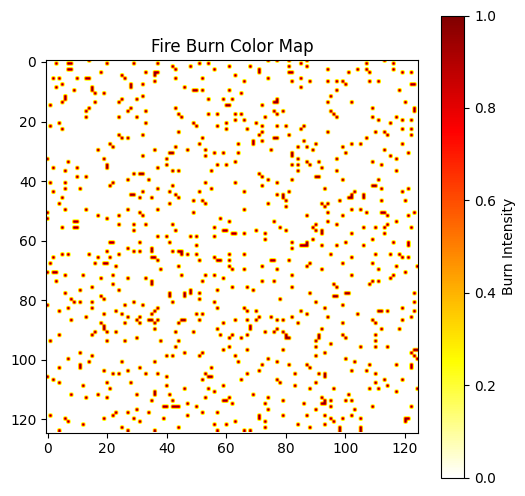

Time=  1


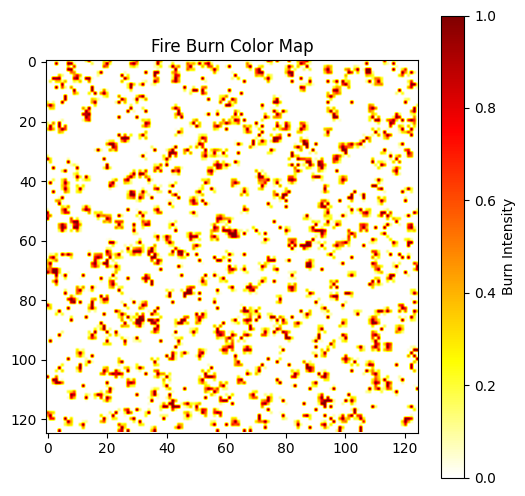

Time=  2


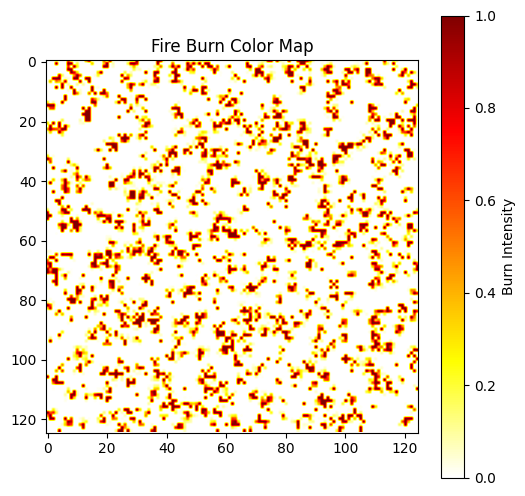

Time=  3


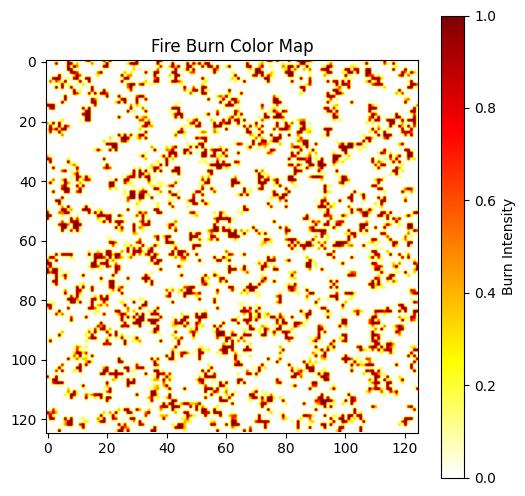

Time=  4


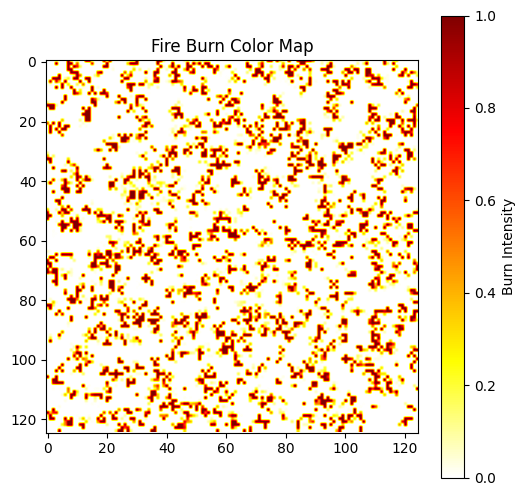

Time=  5


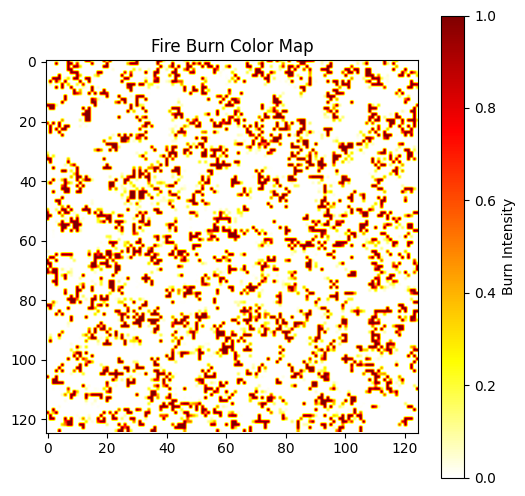

Time=  6


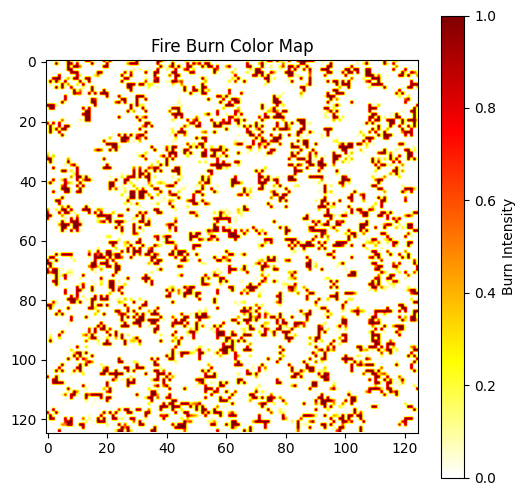

Time=  7


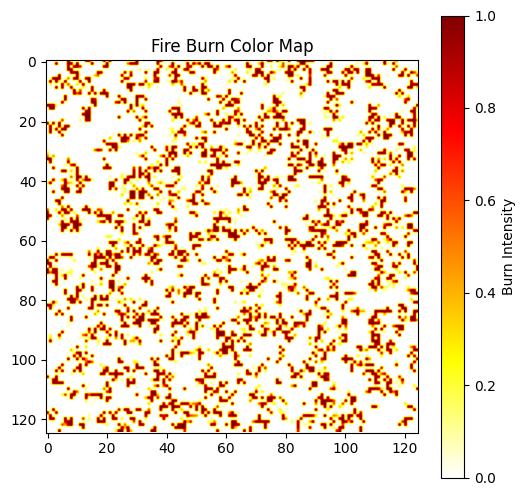

Time=  8


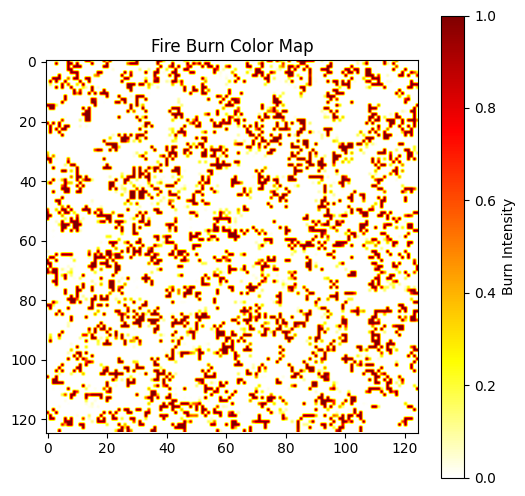

Time=  9


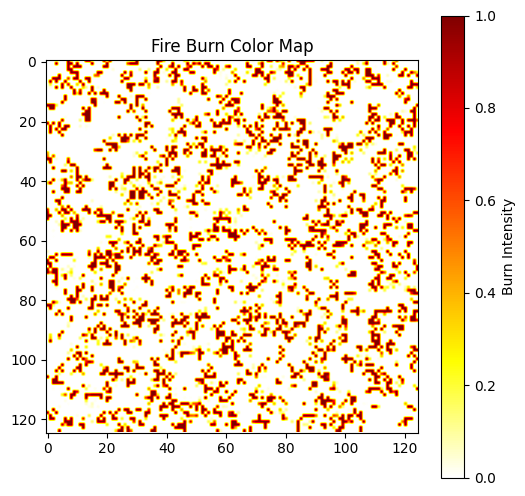

Time=  10


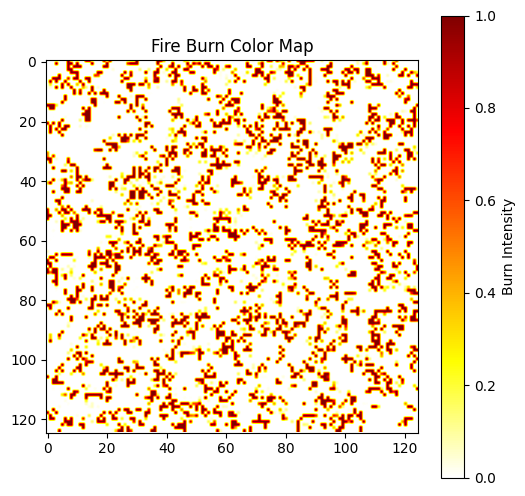

In [319]:
forest.ca_rule_update(10)